# Twitter API

Twitter API v2

In [101]:
# Instalação das bibliotecas
#%pip install pandas --quiet
#%pip install tweepy --quiet
#%pip install wordcloud --quiet
#%pip install scipy --quiet

In [102]:
# Importando as bibliotecas
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
import tweepy as tw
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os
from os import path
import random
from scipy.ndimage import gaussian_gradient_magnitude

In [103]:
# Autenticação
bearer_token = 'Suas chaves'
client = tweepy.Client(bearer_token)

In [104]:
# Recuperando Tweets
response = client.search_recent_tweets("Python", max_results=100)

In [105]:
# Imprimindo Tweets
tweets = response.data

for tweet in tweets:
    #print(tweet.id)
    print(tweet.text)

RT @essay_help_pay: Looking for a tutor to take your final exams?
Get online class 
#Paperpay.
#python.
#homework.
#Onlineclass
#Essaypay
#…
RT @m2mtechconnect: Echo3D has raised $5.5M for cloud authoring tools for AR/VR/3D content! 👏🏻🤩

#VR #AR #Cloud #BigData #Analytics #DataSc…
RT @kyyba_tech: #Infographic - Machine Learning applied to Big Data!

Image source @CatherineAdenle &amp; Via @EnFuseSolution

#DataScience #Da…
RT @PamelaHensley22: Monty Python's Eric Idle says he hates conservatives: "they're horrible people." Conservatives make up 80% of Monty Py…
Yuk yang lagi butuh joki tugas/real-time STATISTIK,olah data skripsi SPSS/Python/Eviews/Smartpls/Excel/Rapidminer/R Studio/Minitab/Data Studio/Power BI/Mysql/Tableau bs hubungi kami ya,dikerjakan langsung oleh mahasiswa STATISTIKA TOP 3 PTN #zonauang #zonaba #jokitugas #zonajajan
RT @m2mtechconnect: Echo3D has raised $5.5M for cloud authoring tools for AR/VR/3D content! 👏🏻🤩

#VR #AR #Cloud #BigData #Analytics #DataSc…
A million 

In [106]:
# Agrupando os tweets em um dataframe
tweets_list = [[tweet.text] for tweet in tweets]
df = pd.DataFrame(tweets_list,columns=['Texto'])
pd.options.display.max_colwidth = 130 
df.head()

,Texto
0,RT @essay_help_pay: Looking for a tutor to take your final exams?\nGet online class \n#Paperpay.\n#python.\n#homework.\n#Onlin...
1,RT @m2mtechconnect: Echo3D has raised $5.5M for cloud authoring tools for AR/VR/3D content! 👏🏻🤩\n\n#VR #AR #Cloud #BigData #An...
2,RT @kyyba_tech: #Infographic - Machine Learning applied to Big Data!\n\nImage source @CatherineAdenle &amp; Via @EnFuseSolutio...
3,"RT @PamelaHensley22: Monty Python's Eric Idle says he hates conservatives: ""they're horrible people."" Conservatives make up 80..."
4,"Yuk yang lagi butuh joki tugas/real-time STATISTIK,olah data skripsi SPSS/Python/Eviews/Smartpls/Excel/Rapidminer/R Studio/Min..."


In [107]:
# Agrupando os tweets em uma string única
string = pd.Series(df['Texto'].values).str.cat(sep=' ')
string

'RT @essay_help_pay: Looking for a tutor to take your final exams?\nGet online class \n#Paperpay.\n#python.\n#homework.\n#Onlineclass\n#Essaypay\n#… RT @m2mtechconnect: Echo3D has raised $5.5M for cloud authoring tools for AR/VR/3D content! 👏🏻🤩\n\n#VR #AR #Cloud #BigData #Analytics #DataSc… RT @kyyba_tech: #Infographic - Machine Learning applied to Big Data!\n\nImage source @CatherineAdenle &amp; Via @EnFuseSolution\n\n#DataScience #Da… RT @PamelaHensley22: Monty Python\'s Eric Idle says he hates conservatives: "they\'re horrible people." Conservatives make up 80% of Monty Py… Yuk yang lagi butuh joki tugas/real-time STATISTIK,olah data skripsi SPSS/Python/Eviews/Smartpls/Excel/Rapidminer/R Studio/Minitab/Data Studio/Power BI/Mysql/Tableau bs hubungi kami ya,dikerjakan langsung oleh mahasiswa STATISTIKA TOP 3 PTN #zonauang #zonaba #jokitugas #zonajajan RT @m2mtechconnect: Echo3D has raised $5.5M for cloud authoring tools for AR/VR/3D content! 👏🏻🤩\n\n#VR #AR #Cloud #BigData #Analytics #

In [108]:
# Removendo caracteres especiais
caracteres = "#@"

for i in range(len(caracteres)):
    string = string.replace(caracteres[i],"")
string

'RT essay_help_pay: Looking for a tutor to take your final exams?\nGet online class \nPaperpay.\npython.\nhomework.\nOnlineclass\nEssaypay\n… RT m2mtechconnect: Echo3D has raised $5.5M for cloud authoring tools for AR/VR/3D content! 👏🏻🤩\n\nVR AR Cloud BigData Analytics DataSc… RT kyyba_tech: Infographic - Machine Learning applied to Big Data!\n\nImage source CatherineAdenle &amp; Via EnFuseSolution\n\nDataScience Da… RT PamelaHensley22: Monty Python\'s Eric Idle says he hates conservatives: "they\'re horrible people." Conservatives make up 80% of Monty Py… Yuk yang lagi butuh joki tugas/real-time STATISTIK,olah data skripsi SPSS/Python/Eviews/Smartpls/Excel/Rapidminer/R Studio/Minitab/Data Studio/Power BI/Mysql/Tableau bs hubungi kami ya,dikerjakan langsung oleh mahasiswa STATISTIKA TOP 3 PTN zonauang zonaba jokitugas zonajajan RT m2mtechconnect: Echo3D has raised $5.5M for cloud authoring tools for AR/VR/3D content! 👏🏻🤩\n\nVR AR Cloud BigData Analytics DataSc… A million reasons you sh

In [109]:
# Ignorando classes de palavras
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.update(["é","e", "RT", "da", "fez", "deu", "mai", "ser", "tanto", "Deu", "até", "aos", "fazer", "isso", "muito", "tinha", "usaria", "contra", "pera", "meu", "em", "você", "de", "ao", "os", "não", "feira", "na", "que", "eu", "https", "co", "camisa", "pro", "hora","sport", "ceara", "ceará", "tem", "se", "um", "uma", "que", "foi", "está", "aqui,", "para", "vai", "ter", "mas", "já", "nos", "vem", "sobre", "sendo", "dia", "ver","por", "nossa", "quem", "toda", "tambem", "mais", "sem", "seja", "era", "São", "Paulo", "tá", "pelo", "só", "faz", "pode", "hoje", "nem", "para","depende", "vc", "ele", "ante", "ainda", "assim", "meio", "mesmo", "essa", "bem", "todo", "às", "dos", "veja", "estão","pra", "como", "Cha", "ou", "vcs", "sera", "nas", "das", "porque", "desde", "esse", "né", "todos", "tenho", "ficar", "pela", "Chap"])

fura_color = np.array(Image.open(os.path.join("C:/Users/Thunder/Downloads/Nova pasta/nuvem.jpg")))


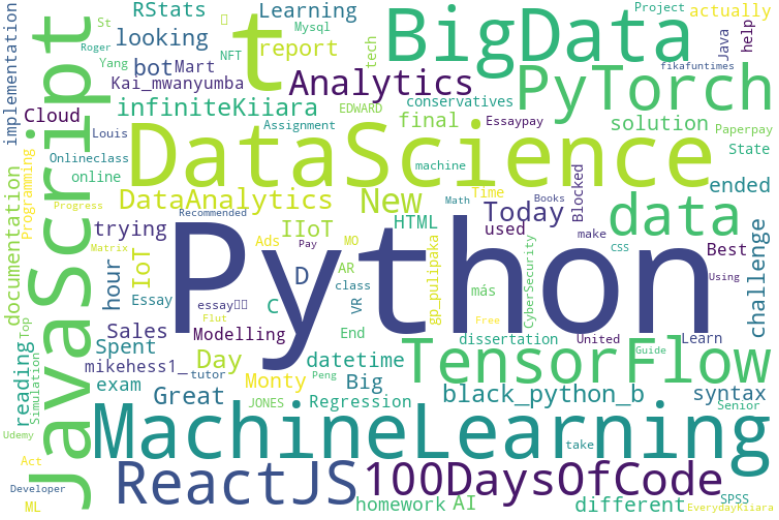

In [110]:
# Word Cloud com os textos dos tweets
wordcloud = WordCloud(width=750 ,stopwords=stopwords,height=500,max_font_size=150,min_font_size=10,collocations=False, background_color='white').generate(string)
#mask=fura_color - se quiser uma imagem recortada certinha
image_colors = ImageColorGenerator(fura_color)

fig, ax = plt.subplots(figsize=(50,50), dpi=20)
ax.imshow(wordcloud.recolor(color_func=None), interpolation="bilinear")
ax.set_axis_off()
plt.show()
wordcloud.to_file("wordcloud.png")


#plt.figure(figsize=(40,30))
#plt.imshow(wordcloud, interpolation="bilinear")
#plt.axis("off")
#plt.show()


# Autor

<a href="https://www.youtube.com/channel/UCa-d0hwYHOu6ehwc_oMjOoA" target="_blank">Alcides Lino (canal Programação e Liberdade)</a>

---

# Registro de Alterações (*Change Log*)

| Data (DD/MM/YYYY) | Versão  | Alterado Por | Descrição da Mudança                |
| ----------------- | ------- | ------------ | ----------------------------------- |
| 27/03/2022        | 1.0     | Alcides      | Versão inicial                      |